# Module 5: Data Manipulation 
## Case Study – 2

In [50]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [51]:
# Load the data
data = pd.read_csv('Salaries.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148648 non-null  int64  
 1   EmployeeName      148648 non-null  object 
 2   JobTitle          148648 non-null  object 
 3   BasePay           148043 non-null  float64
 4   OvertimePay       148648 non-null  float64
 5   OtherPay          148648 non-null  float64
 6   Benefits          112490 non-null  float64
 7   TotalPay          148648 non-null  float64
 8   TotalPayBenefits  148648 non-null  float64
 9   Year              148648 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148648 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


C:\Users\akram\AppData\Local\Temp\ipykernel_19200\2829350274.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [52]:
# Check Null values
data .isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36158
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148648
Agency                   0
Status              110529
dtype: int64

In [53]:
# 1. Compute how much total salary cost has increased from 2011 to 2014
# Group data by year and sum TotalPayBenefits for each year
total_cost_by_year = data.groupby('Year')['TotalPayBenefits'].sum()
print(total_cost_by_year.info)
# Iterate through the grouped data
for year, tot_cost in total_cost_by_year.items():
    print(f"Year: {year}, Total Salary Cost: ${tot_cost:.2f}")

# Calculate the increase from 2011 to 2014
cost_increase = total_cost_by_year[2014] - total_cost_by_year[2011]
print(f"Total salary cost increased by: ${cost_increase:.2f}")


<bound method Series.info of Year
2011    2.594113e+09
2012    3.696790e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalPayBenefits, dtype: float64>
Year: 2011, Total Salary Cost: $2594113030.72
Year: 2012, Total Salary Cost: $3696790118.45
Year: 2013, Total Salary Cost: $3814772184.37
Year: 2014, Total Salary Cost: $3821865780.60
Total salary cost increased by: $1227752749.88


In [54]:
# 2. Which Job Title in the Year 2014 has the highest mean salary?
# Filter data for the year 2014
data_2014 = data[data['Year'] == 2014]
print(data_2014.info())
print(data_2014.isnull().sum())  # check null values
print(data_2014.head(5))

JobTitle_BasePay_2014 = data_2014.groupby('JobTitle')['BasePay'].mean()

# Sort by BasePay in descending order and get the top 5
top_jobs_2014 = JobTitle_BasePay_2014.sort_values(ascending=False)

# Print the top 5 job titles with their mean salaries
print("\nTop 5 Job Titles with the highest mean salaries in 2014:")
for jobtitle, basepay in top_jobs_2014[:5].items():
    print(f"Job Title: {jobtitle}, Mean Salary: ${basepay:.2f}")

# Group by JobTitle and calculate mean BasePay
highest_mean_salary_job = data_2014.groupby('JobTitle')['BasePay'].mean().idxmax()
print(f"\nJob Title with the highest mean salary in 2014: {highest_mean_salary_job}")


<class 'pandas.core.frame.DataFrame'>
Index: 38119 entries, 110529 to 148647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  float64
 4   OvertimePay       38119 non-null  float64
 5   OtherPay          38119 non-null  float64
 6   Benefits          38119 non-null  float64
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            38119 non-null  object 
 12  Status            38119 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 4.1+ MB
None
Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay   

In [55]:
# 3. How much money could have been saved in the Year 2014 by stopping OverTimePay?
# Sum OverTimePay for 2014
overtime_cost_2014 = data_2014['OvertimePay'].sum()
print(f"Money saved by stopping OverTimePay in 2014: ${overtime_cost_2014:.2f}")


Money saved by stopping OverTimePay in 2014: $205918599.27


Top 5 common jobs in 2014 
 JobTitle
Transit Operator                2479
Special Nurse                   1478
Registered Nurse                1234
Public Svc Aide-Public Works     916
Firefighter                      815
Name: count, dtype: int64

Top 5 common jobs in 2014 and their total costs:
JobTitle
Firefighter                     1.448270e+08
Public Svc Aide-Public Works    9.806317e+06
Registered Nurse                1.872165e+08
Special Nurse                   5.344305e+07
Transit Operator                2.149764e+08
Name: TotalPayBenefits, dtype: float64

Top 5 common jobs in 2014 and their total costs:
Job Title: Firefighter, Total Cost: $144,827,011.84
Job Title: Public Svc Aide-Public Works, Total Cost: $9,806,317.44
Job Title: Registered Nurse, Total Cost: $187,216,454.08
Job Title: Special Nurse, Total Cost: $53,443,054.51
Job Title: Transit Operator, Total Cost: $214,976,389.79


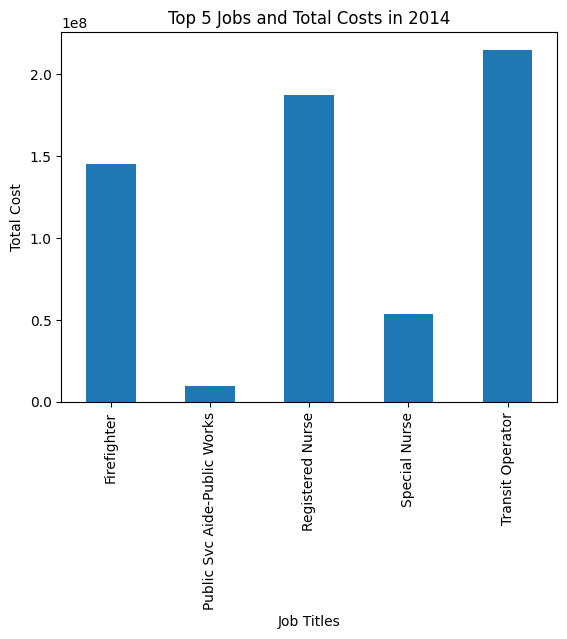

In [56]:
# 4. Top 5 common jobs in 2014 and their total cost to SFO # SFO stands for San Francisco
# Finding Top 5 Common Jobs:
top_5_jobs = data_2014['JobTitle'].value_counts().head(5)
# The .value_counts() method in pandas returns the counts of unique values in a Series. It is commonly used to find the frequency of occurrences for each value in a column.

print("Top 5 common jobs in 2014 \n", top_5_jobs)

# Calculate the total cost for each of these jobs
# Filtering Data for Top 5 Jobs: the 5 most common jobs in 2014
data_top_5_jobs = data_2014[data_2014['JobTitle'].isin(top_5_jobs.index)]
#print(data_top_5_jobs)

# Calculating Total Costs: Calculate the total cost for each of these jobs
top_5_jobs_cost = data_top_5_jobs.groupby('JobTitle')['TotalPayBenefits'].sum()
print("\nTop 5 common jobs in 2014 and their total costs:")
print(top_5_jobs_cost)


print("\nTop 5 common jobs in 2014 and their total costs:")
for job, cost in top_5_jobs_cost.items():
    print(f"Job Title: {job}, Total Cost: ${cost:,.2f}")


top_5_jobs_cost.plot(kind='bar', title='Top 5 Jobs and Total Costs in 2014', ylabel='Total Cost', xlabel='Job Titles')
plt.show()

Top earning employee across all years: NATHANIEL FORD with TotalPayBenefits: $567595.43

Top 5 earning employees across all years:
Employee: NATHANIEL FORD, Job Title: GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY, TotalPayBenefits: $567595.43
Employee: GARY JIMENEZ, Job Title: CAPTAIN III (POLICE DEPARTMENT), TotalPayBenefits: $538909.28
Employee: David Shinn, Job Title: Deputy Chief 3, TotalPayBenefits: $510732.68
Employee: Amy P Hart, Job Title: Asst Med Examiner, TotalPayBenefits: $479652.21
Employee: William J Coaker Jr., Job Title: Chief Investment Officer, TotalPayBenefits: $436224.36


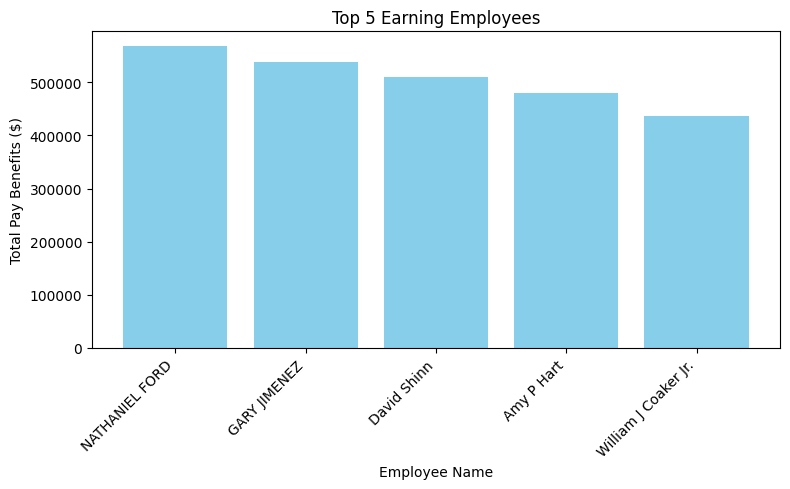

In [57]:
# 5. Who was the top earning employee across all the years?
# Find the employee with the highest TotalPayBenefits
top_earner = data.loc[data['TotalPayBenefits'].idxmax()]
print(f"Top earning employee across all years: {top_earner['EmployeeName']} with TotalPayBenefits: ${top_earner['TotalPayBenefits']:.2f}")


# Get the top 5 rows with the highest TotalPayBenefits
top_5_earners = data.nlargest(5, 'TotalPayBenefits')

# Print the results
print("\nTop 5 earning employees across all years:")
for index, row in top_5_earners.iterrows():
    print(f"Employee: {row['EmployeeName']}, Job Title: {row['JobTitle']}, TotalPayBenefits: ${row['TotalPayBenefits']:.2f}")

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_5_earners['EmployeeName'], top_3_earners['TotalPayBenefits'], color='skyblue')

# Add labels and title
plt.xlabel('Employee Name')
plt.ylabel('Total Pay Benefits ($)')
plt.title('Top 5 Earning Employees')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
#Enhancements
# 6.1: Last 5 common jobs in 2014 and their total costs
# Get the last 5 common jobs in 2014
last_5_jobs = data_2014['JobTitle'].value_counts().tail(5).index

# Calculate the total cost for each of these jobs
last_5_jobs_cost = data_2014[data_2014['JobTitle'].isin(last_5_jobs)].groupby('JobTitle')['TotalPayBenefits'].sum()
print("Last 5 common jobs in 2014 and their total costs:")
print(last_5_jobs_cost)


Last 5 common jobs in 2014 and their total costs:
JobTitle
Baker                        14114.55
Cashier 3                     2074.60
Chief Investment Officer    436224.36
Transit Planner 2            14803.33
Transit Planner 4            16008.88
Name: TotalPayBenefits, dtype: float64


In [59]:
# 6.2: OverTimePay as a percentage of TotalPayBenefits in 2011
# Filter data for the year 2011
data_2011 = data[data['Year'] == 2011]

# Calculate percentage of OverTimePay to TotalPayBenefits
overtime_percentage_2011 = (data_2011['OvertimePay'].sum() / data_2011['TotalPayBenefits'].sum()) * 100
print(f"OverTimePay as a percentage of TotalPayBenefits in 2011: {overtime_percentage_2011:.2f}%")


OverTimePay as a percentage of TotalPayBenefits in 2011: 6.32%


In [60]:
# 6.3: Job Title in 2014 with the lowest mean salary
# Job Title with the lowest mean BasePay in 2014
# Group by JobTitle and calculate mean BasePay
mean_salary_by_job = data_2014.groupby('JobTitle')['TotalPayBenefits'].mean()
#mean_salary_by_job.info()

# Find the Job Title with the lowest mean salary
lowest_mean_salary_job = mean_salary_by_job.idxmin()
lowest_mean_salary_value = mean_salary_by_job.min()

# Print the results
print(f"Job Title with the lowest mean salary in 2014: {lowest_mean_salary_job}")
print(f"Lowest mean salary in 2014: ${lowest_mean_salary_value:.2f}")


Job Title with the lowest mean salary in 2014: BdComm Mbr, Grp2,M=$25/Mtg
Lowest mean salary in 2014: $345.42


### Summary of Outputs
1. Salary increase: Difference in total costs between 2011 and 2014.
2. Highest-paying job: Job title with the highest average BasePay in 2014.
3. Savings by cutting OverTimePay: Total amount spent on OverTimePay in 2014.
4. Top 5 jobs in 2014: List of jobs and their total costs.
5. Top earner: Employee with the highest total pay benefits across all years.
6. Additional insights: Last 5 jobs, overtime percentage, and lowest-paying job in 2014